# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [9]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [97]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,1.626695,0.699981,2.240525,-0.143113,-2.011860,182.487285
1,0.168814,0.229824,-0.324473,0.057928,0.817784,24.125788
2,1.369084,0.958230,-0.498937,-0.282447,0.290905,165.769760
3,-0.078810,-0.917429,0.448222,-0.176733,1.432204,-38.001244
4,-1.010850,0.935425,-0.826375,2.136908,1.021542,-68.170379


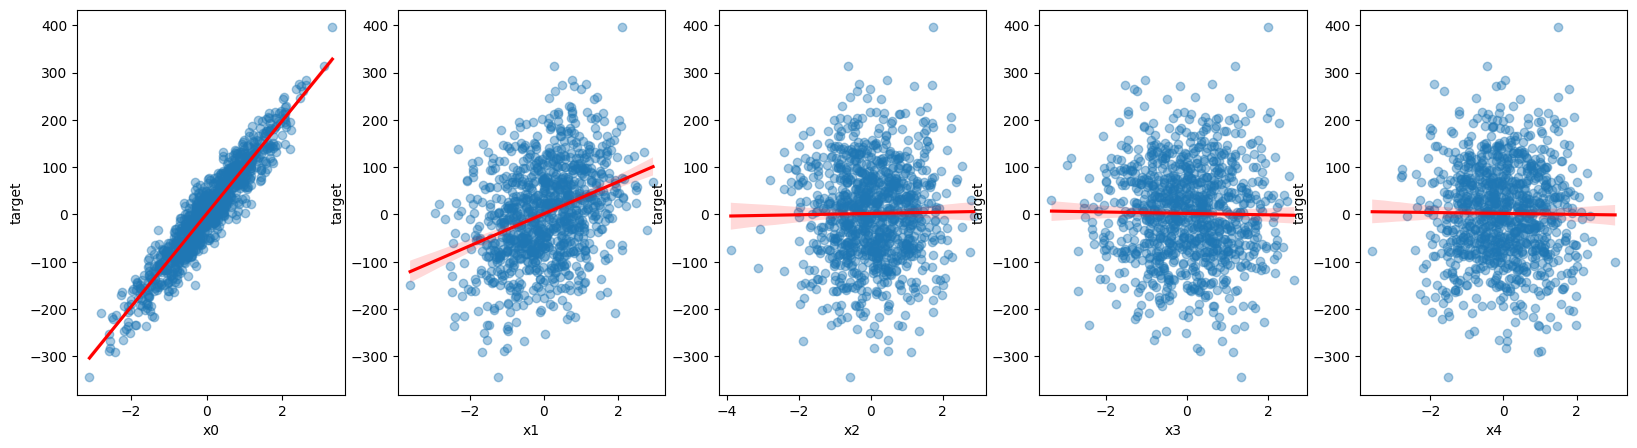

In [98]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [99]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [100]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

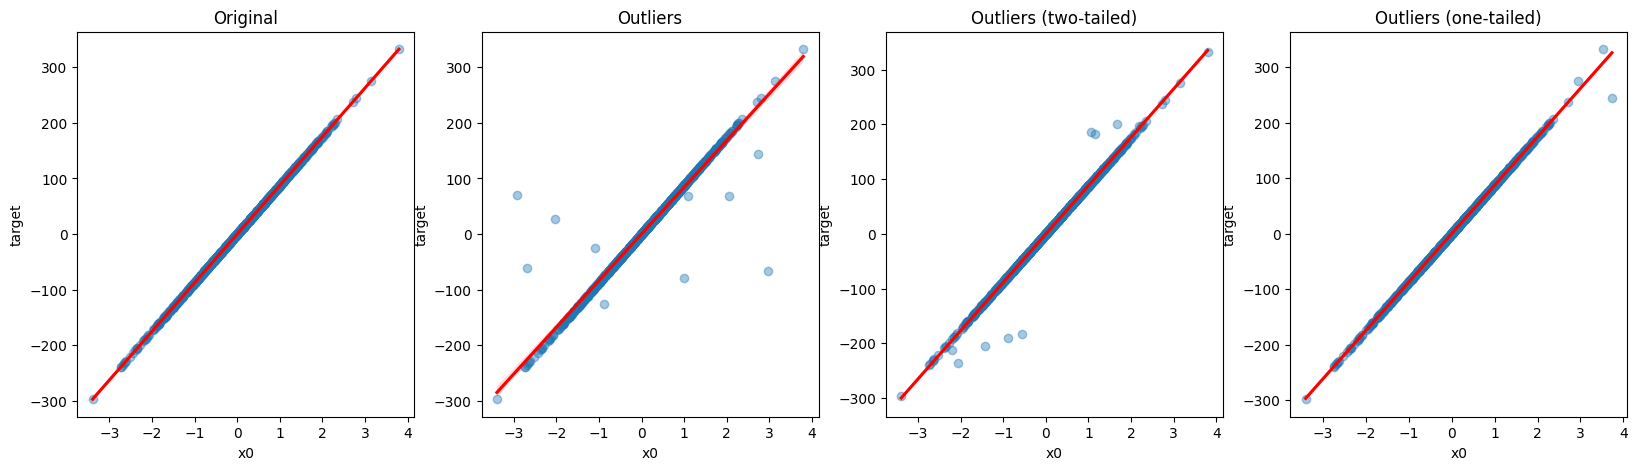

In [101]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

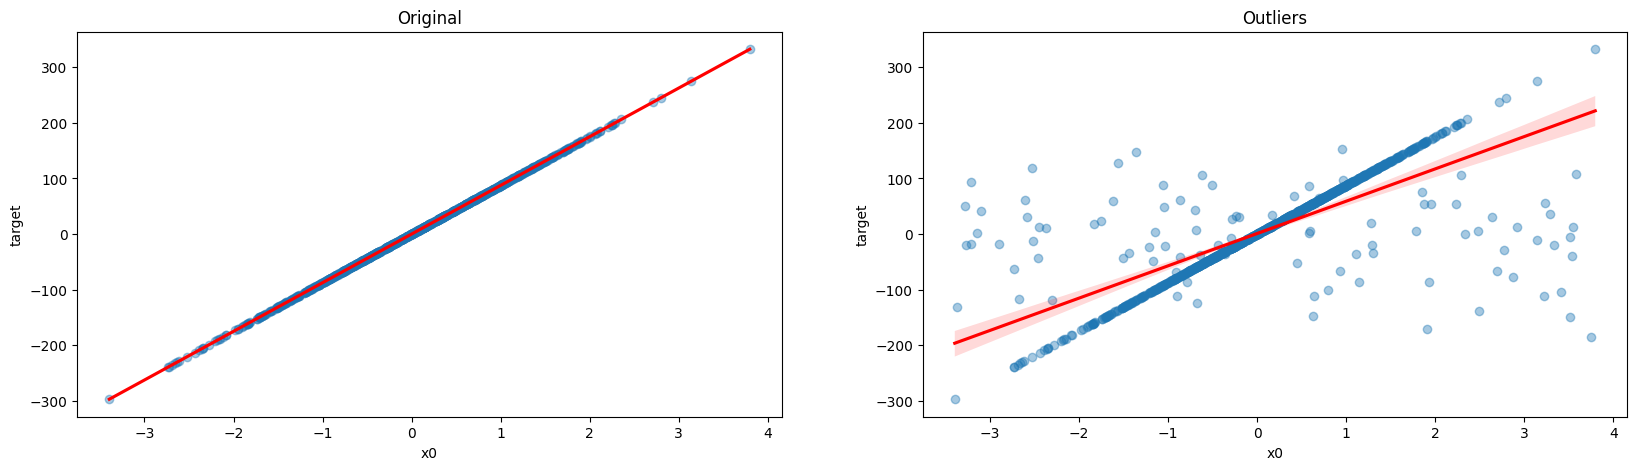

In [102]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El Rmae de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

hint: aca lo que tengo que hacer es correr las simulaciones y guardar los valores de los parametros en un dataframe. Luego inicialmente hacer histograma con la distribucion de cada k y luego plantear un test de hipotesis


In [113]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 5
n_informative = 3
n_targets = 1

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)

In [114]:
betas_list = []
train_rmae_list = []
test_rmae_list = []
train_mae_list = []
test_mae_list = []

## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=0.2,
                bias=10,
                output='dataframe'
            )
            X = data.values[:, :-1]
            y = data['target'].values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)

            #Calculate metrics in tranning
            y_train_pred = model.predict(X_train)
            train_rmae = np.sqrt(mean_squared_error(y_train, y_train_pred))
            train_mae = mean_absolute_error(y_train, y_train_pred)
            train_rmae_list.append(train_rmae)
            train_mae_list.append(train_mae)    

            #Calculate metrics in test
            y_test_pred = model.predict(X_test)
            test_rmae = np.sqrt(mean_squared_error(y_test, y_test_pred))
            test_mae = mean_absolute_error(y_test, y_test_pred)
            test_rmae_list.append(test_rmae)
            test_mae_list.append(test_mae)
            
            
            betas_list.append(model.coef_)





100%|██████████| 100/100 [09:26<00:00,  5.67s/it]


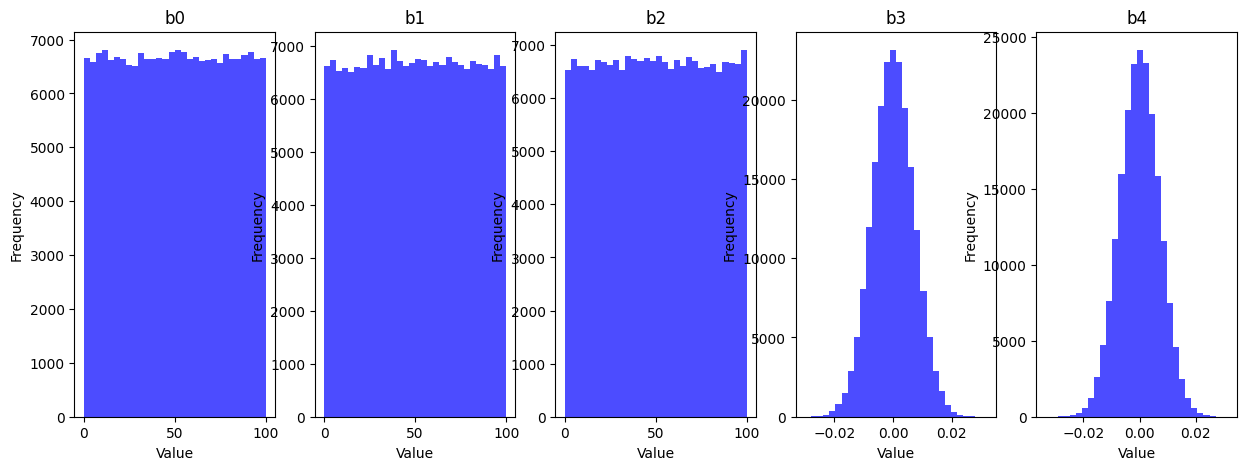

In [116]:
betas_df = pd.DataFrame(data=betas_list, columns=['b0', 'b1', 'b2', 'b3', 'b4'])

# Create subplots for each column
fig, axes = plt.subplots(1, betas_df.shape[1], figsize=(15, 5))
# Plot histograms for each column
for i, col in enumerate(betas_df.columns):
    ax = axes[i]
    ax.hist(betas_df[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

In [119]:
betas_df['b3'].mean()

1.7819175773203094e-05

Se observa que para los coeficientes b3 y b4, se observa su distribución tiene una forma aproximadamente normal con media cercana a cero.

Para comprobar esto, plantearemos el test de hipotesis: 

- h0 = "mean_b3 > 1e-4"
- h1 = "mean_b3 < 1e-4"

Y se repetirá también para b4. 

In [127]:
from scipy import stats

threshold = 1e-4
for column in ['b3', 'b4']:
    
    sample_data = betas_df[column]

    # Perform the t-test
    t_statistic, p_value = stats.ttest_1samp(sample_data, threshold)
    alpha = 0.05

    if p_value < alpha:
        print(f"El valor p es {p_value}, por lo tanto, rechazamos la hipótesis nula.")
    else:
        print(f"El valor p es {p_value}, por lo tanto, no rechazamos la hipótesis nula.")

    if t_statistic < 0:
        print(f"La media de {column} es menor que {threshold}.")
    else:
        print(f"La media de {column} es mayor o igual a {threshold}.")


El valor p es 2.0897055427785195e-07, por lo tanto, rechazamos la hipótesis nula.
La media de b3 es menor que 0.0001.
El valor p es 8.807471077758189e-09, por lo tanto, rechazamos la hipótesis nula.
La media de b4 es menor que 0.0001.


Se puede concluir, a partir del resultado del test de hipotesis, que la media de de los coeficientes de las variables no informativas, tienen un valor cercano a cero y mucho menores a los coeficientes informativos, por lo tanto, no tienen influencia en el resultado de la regresión. 

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [150]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

Mean MAE for simple:  1.471156690244208
Mean MAE for ridge:  1.4688992311515952
Mean MAE for hubber:  1.0952628866202156


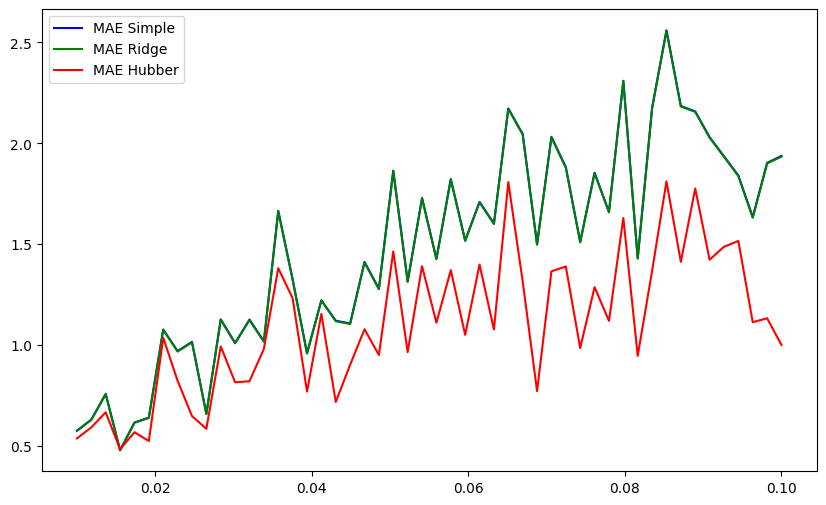

In [187]:
outlier_percentage_range = np.linspace(0.01, 0.1, 50)

mae_simple = []
mae_hubber = []
mae_ridge = []

data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5,
    output='dataframe'
)

for percentage in outlier_percentage_range:

    #Add outliers to dataset: 

    data_w_outliers = generate_outliers(
        df=data,
        percentage=percentage,
        extreme_outliers=False,
        only_tails=True,
        two_tailed=True)
    
    # Split dataset into train and test: 

    X = data_w_outliers.values[:, :-1]
    y = data_w_outliers['target'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #fit linear simple
    model_simple = LinearRegression()
    model_simple.fit(X_train, y_train)

    y_test_simple = model_simple.predict(X_test)

    mae_simple.append(mean_absolute_error(y_test_simple, y_test))

    #fit linear hubber
    model_hubber = HuberRegressor()
    model_hubber.fit(X_train, y_train)

    y_test_hubber = model_hubber.predict(X_test)

    mae_hubber.append(mean_absolute_error(y_test_hubber, y_test))

    #fit linear ridge
    model_ridge = RidgeCV()
    model_ridge.fit(X_train, y_train)

    y_test_ridge = model_ridge.predict(X_test)

    mae_ridge.append(mean_absolute_error(y_test_ridge, y_test))

print("Mean MAE for simple: ", np.mean(mae_simple))
print("Mean MAE for ridge: ", np.mean(mae_ridge))
print("Mean MAE for hubber: ", np.mean(mae_hubber))



# Create the plot
plt.figure(figsize=(10, 6))  

plt.plot(outlier_percentage_range, mae_simple, label='MAE Simple', color='blue')
plt.plot(outlier_percentage_range, mae_ridge, label='MAE Ridge', color='green')
plt.plot(outlier_percentage_range, mae_hubber, label='MAE Hubber', color='red')
plt.legend()

Se puede apreciar que a medida que incrementa la proporción de valores outliers en el conjunto de datos, el modelo Huber muestra una menor afectación en su rendimiento en comparación con los modelos Ridge y Simple. Este comportamiento es coherente con la naturaleza de la regularización aplicada en cada uno de estos modelos.

Además, es notable que el rendimiento del modelo Ridge es ligeramente superior al del modelo Simple.

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [5]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [14]:
def gradient_descent(X_train, y_train, X_test, y_test, theta, n_epochs = 100, lr = 0.001, min_learning = 1e-5):
   
    epoch_mse_train = []
    epoch_mse_test = []
    
    for _ in range(n_epochs):
        if len(epoch_mse_train)>1:
            if np.abs(epoch_mse_train[-1] - epoch_mse_train[-2]) < min_learning:
                break

        theta = theta - lr * gradient(X_train, y_train, theta)

        y_pred_train = X_train.dot(theta)

        mse = np.mean((y_train-y_pred_train)**2)
        epoch_mse_train.append(mse)

        #Validate
        y_pred_test = X_test.dot(theta)

        mse_test = np.mean((y_test-y_pred_test)**2)
        epoch_mse_test.append(mse_test)

    return theta, epoch_mse_train, epoch_mse_test

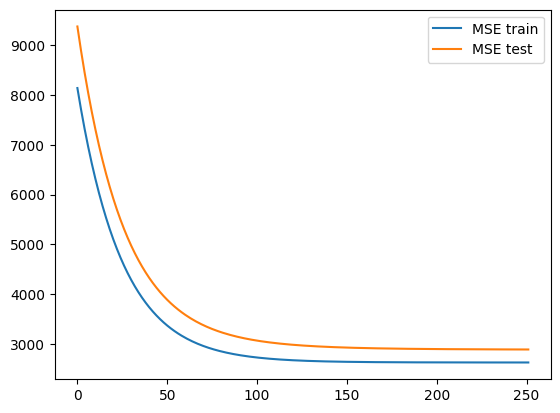

In [46]:
X, y = generate_dataset(
                n_samples=1000,
                n_features=1,
                n_informative=1,
                n_targets=1,
                noise=50,
                bias=10,
                output='array'
            )

theta = np.random.randn(2)

X = np.hstack((np.ones((X.shape[0], 1)), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

theta, mse_train, mse_test = gradient_descent(X_train, y_train, X_test, y_test, theta, n_epochs=1000, lr = 1e-2, min_learning=0.01)

plt.figure()
plt.plot(mse_train, label = 'MSE train')
plt.plot(mse_test, label = 'MSE test')
plt.legend()
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [77]:
import numpy as np

def stochastic_gradient_descent(X_train, y_train, X_test, y_test, theta, n_epochs=100, lr=0.001, min_learning=1e-5, n_samples = 10, batch_size=32):
    epoch_mse_train = []
    epoch_mse_test = []


    for epoch in range(n_epochs):
        if len(epoch_mse_train) > 1:
            if np.abs(epoch_mse_train[-1] - epoch_mse_train[-2]) < min_learning:
                break

        # Mezcla aleatoriamente el conjunto de datos de entrenamiento para cada epoca
        permutation = np.random.permutation(len(y_train))
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, n_samples, batch_size):
            xi_batch = X_train_shuffled[i:i + batch_size]
            yi_batch = y_train_shuffled[i:i + batch_size]
            # Calcular el gradiente para un solo ejemplo y actualizar los pesos
            theta = theta - lr * gradient(xi_batch, yi_batch, theta)

        # Calcular el error de entrenamiento despues de cada época
        y_pred_train = X_train.dot(theta)
        mse = np.mean((y_train - y_pred_train) ** 2)
        epoch_mse_train.append(mse)

        # Calcular el error de prueba despues de cada época
        y_pred_test = X_test.dot(theta)
        mse_test = np.mean((y_test - y_pred_test) ** 2)
        epoch_mse_test.append(mse_test)

    return theta, epoch_mse_train, epoch_mse_test


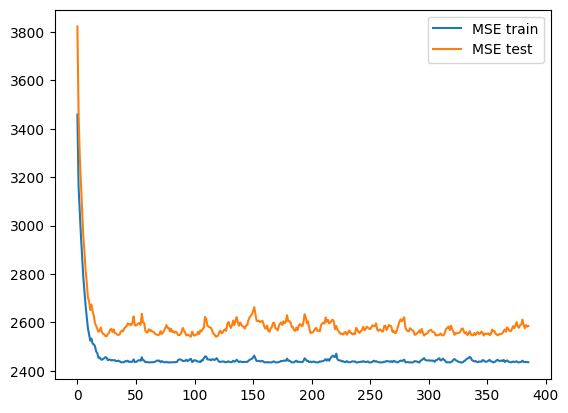

In [85]:
X, y = generate_dataset(
                n_samples=1000,
                n_features=1,
                n_informative=1,
                n_targets=1,
                noise=50,
                bias=10,
                output='array'
            )

theta = np.random.randn(2)

X = np.hstack((np.ones((X.shape[0], 1)), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

theta, mse_train, mse_test = stochastic_gradient_descent(X_train, y_train, X_test, y_test, theta, n_epochs=1000, lr = 1e-2, min_learning=0.01, n_samples = 50, batch_size=8)

plt.figure()
plt.plot(mse_train, label = 'MSE train')
plt.plot(mse_test, label = 'MSE test')
plt.legend()
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

#### Pregunta 1

 Ambos algoritmos siguen la misma lógica, hacen una pasada forward con los datos de entrenamiento, calculan una función de pérdida comparando la salida del modelo con los ground trouth, calculan el gradiente de esa funcion de perdida y luego actualizan los parametros en la dirección de máximo decrecimiento de esta función para así minimizar el error del modelo. La diferencia entre ambos radica simplemente en que para GD se utilizan todos los datos en cada época mientras que para SGD se realiza un sampleo de los datos en cada iteración.


#### Pregunta 2

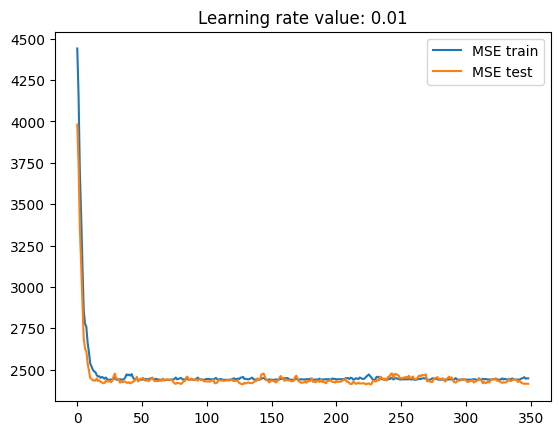

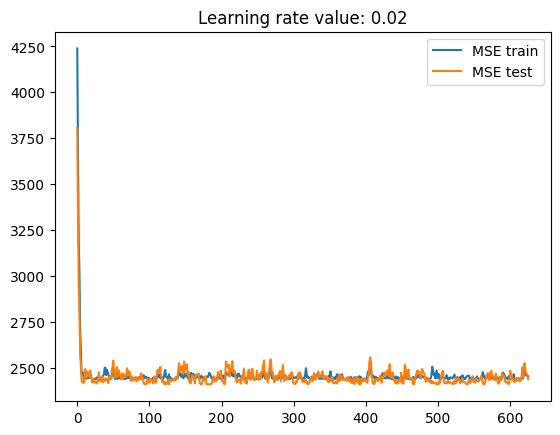

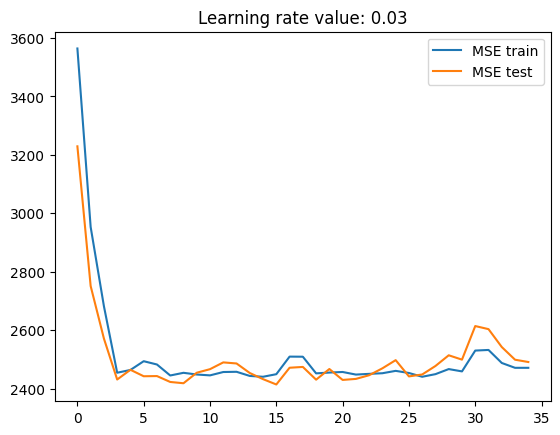

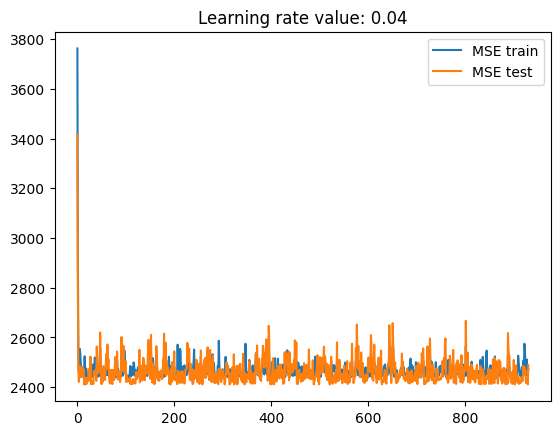

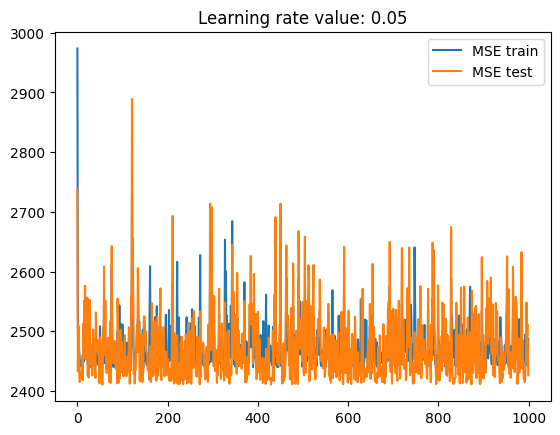

In [91]:
# Ejercicio 2

#Simulacion para SGD
X, y = generate_dataset(
                n_samples=1000,
                n_features=1,
                n_informative=1,
                n_targets=1,
                noise=50,
                bias=10,
                output='array'
            )
X = np.hstack((np.ones((X.shape[0], 1)), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_list = [1e-2, 2e-2, 3e-2, 4e-2, 5e-2]

for lr in lr_list:
    theta = np.random.randn(2)

    

    theta, mse_train, mse_test = stochastic_gradient_descent(X_train, y_train, X_test, y_test, theta, n_epochs=1000, lr = lr, min_learning=0.01, n_samples = 50, batch_size=8)

    plt.figure()
    plt.title(f"Learning rate value: {lr}")
    plt.plot(mse_train, label = 'MSE train')
    plt.plot(mse_test, label = 'MSE test')
    plt.legend()
    plt.show()

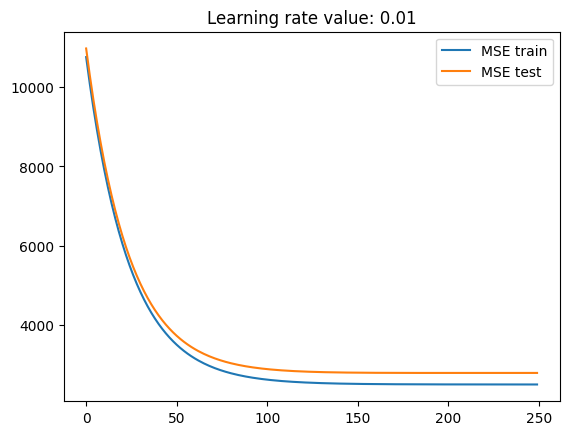

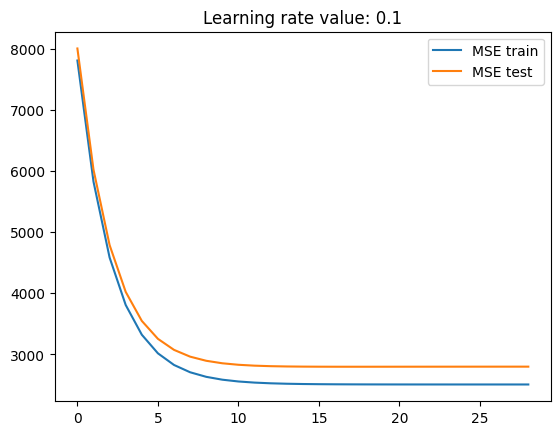

In [96]:
#Simulacion para GD
X, y = generate_dataset(
                n_samples=1000,
                n_features=1,
                n_informative=1,
                n_targets=1,
                noise=50,
                bias=10,
                output='array'
            )
X = np.hstack((np.ones((X.shape[0], 1)), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_list = [1e-2, 1e-1]

for lr in lr_list:
    theta = np.random.randn(2)

    

    theta, mse_train, mse_test = gradient_descent(X_train, y_train, X_test, y_test, theta, n_epochs=1000, lr = lr, min_learning=0.01)

    plt.figure()
    plt.title(f"Learning rate value: {lr}")
    plt.plot(mse_train, label = 'MSE train')
    plt.plot(mse_test, label = 'MSE test')
    plt.legend()
    plt.show()

Para SGD y GD se pueden observar dos efectos distintos al variar el learning rate del algoritmo: 

- Para SGD se observa un notorio aumento en el "ruido" de la curva de entrenamiento a la vez que un aumento en la velocidad de disminución de MSE. Este aumento en el ruido se debe a que al tener un learning rate mayor, se producen cambios mas grandes en los parametros theta en cada iteración. 

- Para SD se observa un ligero aumento en la velocidad de decrecimiento de MSE, debido a que a mayor learning rate se tienen mas cambios en el modelo. No se produce un aumento en las oscilaciones porque en este algoritmo trabajamos siempre con la totalidad del dataset de entrenamiento. 

#### Pregunta 3 


La diferencia interesante entre ambas curvas aparece en que SGD presenta "ruido" en el valor de MSE debido a la presencia del muestreo aleatorio para calcular y optimizar el gradiente, mientras que la otra al usar X train completo presenta una curva suave. 